In [5]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [6]:
data = pd.read_csv('data/gapminder.tsv', sep='\t')

In [7]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Using the gapminder data set, answer the following questions:

1- Plot a histogram showing the distribution of `lifeExp`, use 15 bins

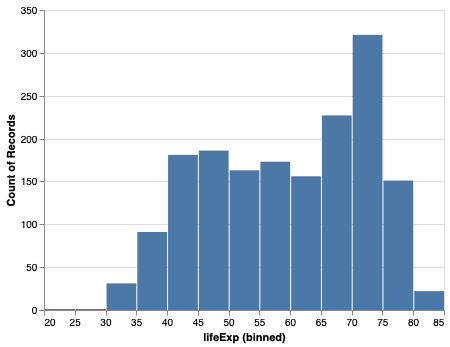

In [17]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('lifeExp', bin=alt.BinParams(maxbins=15)),
    y='count()'
)

2- Create a heatmap showing the joint-distribution of `lifeExp` and `year`. Use 15 bins for each

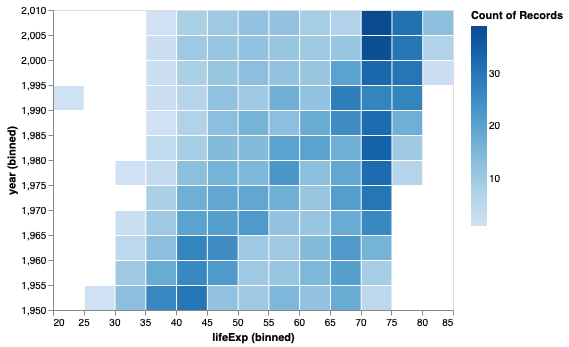

In [35]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('lifeExp', bin=alt.BinParams(maxbins=15)),
    y=alt.Y('year', bin=alt.BinParams(maxbins=15)),
    color='count()'
)

3- Create a horizontal bar chart showing the average life expectancy per continent

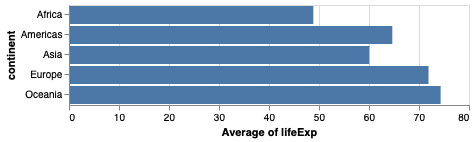

In [36]:
alt.Chart(data).mark_bar().encode(
    alt.X('average(lifeExp):Q'),
    alt.Y('continent:N')
)

4- sort the bars by their height (i.e., continent with higher life expectancy are first)

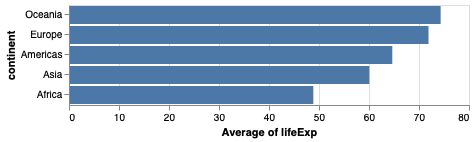

In [25]:
alt.Chart(data).mark_bar().encode(
    alt.X('average(lifeExp):Q'),
    alt.Y('continent:N', sort=alt.EncodingSortField(
        op='average', field='lifeExp', order='descending')
    )
)

5- Create a bar chart showing bars ranging from the first quartile to the third quartile in each continent. Sort by the median life expectancy

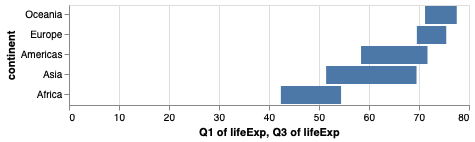

In [29]:
chart1 = alt.Chart(data).mark_bar().encode(
    alt.X('q1(lifeExp):Q'),
    alt.X2('q3(lifeExp):Q'),
    alt.Y('continent:N', sort=alt.EncodingSortField(
        op='median', field='lifeExp', order='descending')
    )
)
chart1

6- show the median life expectancy in each continent as a red tick on the corresponding bar

In [30]:
chart2 = alt.Chart(data).mark_tick(color='red').encode(
    alt.X('median(lifeExp):Q'),
    alt.Y('continent:N', sort=alt.EncodingSortField(
        op='median', field='lifeExp', order='descending')
    )
)

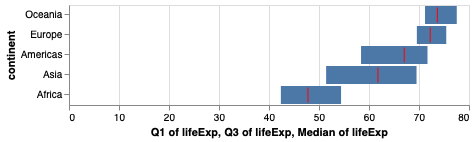

In [31]:
chart1 + chart2